# Milestone 2

## Data Clean

In [1]:
#Marshall
import numpy as np
import pandas as pd

#Graphing
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning 
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Nistler abc
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#%pip install ipywidgets
#%pip install geopy
#%pip install tqdm>=4.9.0

### Import apartments spreadsheet

In [2]:
apartments = pd.read_excel('Apartments spread sheet PDS task.xlsx', sheet_name = 'Sheet1')
apartments.dropna(subset='Address', inplace=True)
#These alreadu have coordinates in dataset, just need to convert some to decimal representation

In [3]:
#Cleaning from Milestone 1
restaurants = pd.read_excel('restaurants.xlsx', sheet_name = 'RESTAURANTS NEAR WSU')
houses = pd.read_excel('Independent Houses.xlsx', sheet_name = 'independent houses near wsu')
restaurants.info()
restaurants.shape
#remove = El papa pollo restaurant(closed perminantly), Albero café	(temp_closed), Dragon express	(temporialy closed), Clouds bar & lounge	(perminaly closed), Pam's wings with things (perminaly closed), Himali Eats	(perminaly closed),
remove_restraunts =["El papa pollo restaurant", "Albero café", "Dragon express", "Clouds bar & lounge", "Pam's wings with things", "Himali Eats"]
restaurants = restaurants[~restaurants['RESTAURANT NAME'].isin(remove_restraunts)]
#remove rating column and will add new column in next step
restaurants = restaurants.drop("Ratings", axis =1)
#Add New columns to the data for the analysis
restaurants['RATINGS_OUTOF5'] = [4.4,3.7,4.2,4.2, 4.3, 4.2, 4.6, 4.4, 4.7, 4.1, 3.8, 4.6, 4.3, 3.2, 4.7, 4.2, 4.5, 4.5, 5.0, 4.4, 4.6, 4.5, 4.3, 4.5, 4.3, 4.1, 4.7, 3.5, 3.6, 3.5, 3.4, 4.1, 4.5, 4.7, 3.9, 4.2, 3.0, 4.0, 3.8, 4.3, 4.6, 4.6, 4.4, 4.5, 4.2, 4.4, 4.5, 4.0, 4.6, 3.7, 4.3]
restaurants['NUM_REVIEWS'] = [260,1291, 18, 704, 291, 285, 1293, 1172, 1575, 661, 1909, 1895, 702, 1700, 580, 504, 843, 394, 97, 9, 67, 14, 17, 187, 893, 30, 88, 309, 16, 1057, 428, 172, 1087, 95, 208, 1398, 737, 225, 689, 1274, 544, 888, 228, 916, 1293, 2383, 1881, 1342, 731, 726, 247]
restaurants['MIN_COST'] = [10, 1,  np.nan, 10 ,10, 1, 10, 10, 50, 1, 10, 10, 10, 1, 10, 10, 20, 10, 10, 10, 10, np.nan, 1, 10, 10, np.nan, 10, 10, np.nan, 10, 1, 10, 10, 10, 10, 1, 1, 10, np.nan, 10, 10, np.nan, np.nan, 10, 10, 10, 20, 10, 10, 10, 10]
restaurants['MAX_COST'] = [20, 10, np.nan, 20, 20, 10, 20, 20, 100, 10, 20, 20, 20, 10, 20, 20, 30, 20, 20, 20, 20, np.nan, 10, 20, 20, np.nan, 20, 20, np.nan, 20, 10, 20, 20, 20, 20, 10, 10, 20, np.nan, 20, 20, np.nan, np.nan, 20, 20, 20, 30, 20, 20, 20, 20]
restaurants['ON_CAMPUS'] = [True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
# Add new data
#"RESTAURANT NAME" : , "DISTANCE FROM WSU":  ,	"ADDRESS" : ,	"MONDAY" : ,	"TUESDAY": ,	"WEDNESDAY" : ,	"THURSDAY" : ,	"FRIDAY" : ,	"SATURDAY" : ,	"SUNDAY" : ,	"TYPE" :  ,	"RATINGS_OUTOF5" : ,	"NUM_REVIEWS" : ,	"MIN_COST" : ,	"MAX_COST" : ,	"ON_CAMPUS" :
new_data = [ {"RESTAURANT NAME" : "Jersey Mike's Subs", "DISTANCE FROM WSU":  0.03,	"ADDRESS" : "4521 E 21st St N Suite 101, Wichita, KS 67208",	"MONDAY" : "10AM-9PM",	"TUESDAY": "10AM-9PM",	"WEDNESDAY" : "10AM-9PM",	"THURSDAY" : "10AM-9PM",	"FRIDAY" : "10AM-9PM",	"SATURDAY" : "10AM-9PM",	"SUNDAY" : "10AM-9PM",	"TYPE" : "Sandwich Shop" ,	"RATINGS_OUTOF5" : 4.2,	"NUM_REVIEWS" : 30,	"MIN_COST" : 10,	"MAX_COST" : 20,	"ON_CAMPUS" : True },
            {"RESTAURANT NAME" : "Two Hands Corn Dogs", "DISTANCE FROM WSU":  .03,	"ADDRESS" : "4510 E 19th St N Suite 106, Wichita, KS 67208",	"MONDAY" : "11AM-9PM",	"TUESDAY": "11AM-9PM",	"WEDNESDAY" : "11AM-9PM",	"THURSDAY" : "11AM-9PM",	"FRIDAY" : "11AM-9PM",	"SATURDAY" : "11AM-9PM",	"SUNDAY" : "11AM-9PM",	"TYPE" :  "Corndog Shop",	"RATINGS_OUTOF5" : 4.6,	"NUM_REVIEWS" : 65,	"MIN_COST" : 10,	"MAX_COST" : 20,	"ON_CAMPUS" : True}
             ]
restaurants = restaurants._append(new_data, ignore_index =True)
# Get the spans of time
restaurants_array = restaurants[['MONDAY', 'TUESDAY',	'WEDNESDAY',	'THURSDAY',	'FRIDAY',	'SATURDAY',	'SUNDAY']].T.values
restaurants_array = restaurants_array.flatten()
list_of_unique = pd.unique(restaurants_array)
list_of_unique = [str(s).replace('\u202f', '') if isinstance(s, str) else s for s in list_of_unique]
spans = {'11AM-11PM': 12.0, '6AM-11PM': 17.0, '11AM-10PM': 11.0, '10:30AM-10:30PM': 12.0, '6:30AM-10PM': 15.50, '4PM-10PM': 6.0, '10:30AM-10PM': 11.5, '4AM-11PM': 19.0, '8AM-2AM': 18.0, '10:30AM-9PM': 10.5, '11AM-8PM': 9.0,
         '11AM-3PM': 4.0, '10AM-7PM': 9.0, '11AM–2:30PM': 3.50, '11AM-9PM': 10.0, '7AM-9PM': 14.0, '7AM-12PM': 5.0, '10AM-10PM': 12.0, '9AM-10PM': 13.0, '3PM-9PM': 6.0, '10:45AM-10:30PM': 11.75, '5PM-10PM': 5.0, '10AM-9PM': 11.0,
         '11AM–2:30PM, 5–9PM': 4.0, '5AM-11PM': 18.0, '4PM-8PM': 4.0, '3PM-10PM': 7.0, '11AM–3PM, 4–8PM': 4.0, '6AM-10PM': 16.0, '9AM-7PM': 10.0, '10:30AM-9:30PM': 11, '10:30AM-11PM': 12.5, '12AM-11:59PM': 11.99, '11AM-12AM': 13.0,
         '11AM–2:30PM, 5–10PM': 5.0, '10AM-5PM': 7.0, '11AM-10:30PM': 11.50, '11AM-1PM': 2.0, '3PM-11PM': 8.0, '5PM-11PM': 6.0, '7AM-11PM': 16.0, '9AM-2PM,5-9PM': 5.0, '4PM-11PM': 7.0, '10AM-11PM': 13.0, '9AM-9PM': 12.0,
         '9AM-2PM': 5.0, '7AM-10PM': 15.0, '10AM-3PM': 5.0, '12PM-5PM': 5.0, '9AM-8PM': 11.0, '12PM-10PM': 10.0, np.nan: 0.0, '0': 0.0, 'Null' : 0.0}

#['MONDAY', 'TUESDAY',	'WEDNESDAY',	'THURSDAY',	'FRIDAY',	'SATURDAY',	'SUNDAY']
restaurants['Hours_Monday'] = restaurants['MONDAY'].map(spans)
restaurants['Hours_Tuesday'] = restaurants['TUESDAY'].map(spans)
restaurants['Hours_Wednesday'] = restaurants['WEDNESDAY'].map(spans)
restaurants['Hours_Thursday'] = restaurants['THURSDAY'].map(spans)
restaurants['Hours_Friday'] = restaurants['FRIDAY'].map(spans)
restaurants['Hours_Saturday'] = restaurants['SATURDAY'].map(spans)
restaurants['Hours_Sunday'] = restaurants['SUNDAY'].map(spans)
specific_columns = ['Hours_Monday', 'Hours_Tuesday', 'Hours_Wednesday', 'Hours_Thursday', 'Hours_Friday', 'Hours_Saturday', 'Hours_Sunday']
restaurants['TotalHours'] = restaurants[specific_columns].sum(axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RESTAURANT NAME    57 non-null     object 
 1   DISTANCE FROM WSU  57 non-null     float64
 2   ADDRESS            57 non-null     object 
 3   MONDAY             56 non-null     object 
 4   TUESDAY            56 non-null     object 
 5   WEDNESDAY          56 non-null     object 
 6   THURSDAY           56 non-null     object 
 7   FRIDAY             56 non-null     object 
 8   SATURDAY           56 non-null     object 
 9   SUNDAY             56 non-null     object 
 10  TYPE               57 non-null     object 
 11  Ratings            0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 5.5+ KB


## Geocoding, add lat and long

In [4]:
#Nistler
#Setup for geopy to geocode the address columns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#Clean out all suite numbers

geolocator = Nominatim(user_agent="httpabc")
#location = geolocator.geocode("175 5th Avenue NYC")
#location = geolocator.geocode(restaurants['ADDRESS'].iloc[0])
location = geolocator.geocode('1711 North Vassar Wichita, KS 67202')

print(location.address)
print((location.latitude, location.longitude))

1711, North Vassar, Fairmount, Wichita, Sedgwick County, Kansas, 67208, United States
(37.714492816326526, -97.295438)


### Clean addresses before geocoding

In [5]:
import re
restaurants_pd = restaurants.copy()

#Remove odd numbers before address
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].str.replace('106, 1861, ', '', regex=False)
#Remove suite numbers
regex_pat = re.compile("(#)(\d\d|\d\d\d|\d\d\d\d)", flags=re.IGNORECASE)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(regex_pat, '', regex=True)
regex_pat = re.compile("(\d,|\d\d,|\d\d\d,|\d\d\d\d,)", flags=re.IGNORECASE)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(regex_pat, ',', regex=True)
regex_pat = re.compile("((S|s)uite|Ste)", flags=re.IGNORECASE)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(regex_pat, '', regex=True)

#Remove building names and random space
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace('Rhatigan Student Center, ', '', regex=True)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace('  ,', ',', regex=True)
restaurants_pd['ADDRESS']=restaurants_pd['ADDRESS'].replace(' ,', ',', regex=True)

restaurants_pd['ADDRESS']

0             4510 E 19th St N, Wichita, KS 67208
1             2939 E 21st St N, Wichita, KS 67214
2             4510 E 19th St N, Wichita, KS 67208
3             4521 E 21st St N, Wichita, KS 67208
4         2424 N Woodlawn Blvd, Wichita, KS 67220
5            1845 Fairmount St, Wichita, KS 67260
6           2721 E Central Ave, Wichita, KS 67214
7               2929 N Rock Rd, Wichita, KS 67226
8           4618 E Central Ave, Wichita, KS 67208
9             6120 E 21st St N, Wichita, KS 67208
10          1350 N Hillside St, Wichita, KS 67214
11          3700 E Douglas Ave, Wichita, KS 67208
12            6100 E 21st St N, Wichita, KS 67208
13          1811 N Hillside St, Wichita, KS 67214
14            2419 E 13th St N, Wichita, KS 67214
15           410 N Hillside St, Wichita, KS 67214
16          4714 E Douglas Ave, Wichita, KS 67208
17          5400 E Central Ave, Wichita, KS 67208
18            4510 E 19th St N, Wichita, KS 67208
19           1845 Fairmount St, Wichita, KS 67260


### Geocode

In [6]:
from tqdm.notebook import tqdm

tqdm.pandas()

locator = Nominatim(user_agent='spatialthoughts', timeout=10)
#Nomatim is rate limited to 1 req per second
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

#restaurants_pd = restaurants.copy()

#UNCOMMENT LINE BELOW TO REQUEST LAT AND LONG UPDATES, Don't run this too many times, can get blacklisted with too many repeat attempts. Supposed to cache the result
#restaurants_pd['location'] = restaurants_pd['ADDRESS'].progress_apply(geocode)
#restaurants_pd['LATITUDE'] = restaurants_pd['location'].apply(lambda loc: loc.latitude if loc else None)
#restaurants_pd['LONGITUDE'] = restaurants_pd['location'].apply(lambda loc: loc.longitude if loc else None)

#restaurants_pd.to_csv('restaurants_with_geolocation.csv')

#Otherwise just read file that I saved
restaurants_geolocation = pd.read_csv('restaurants_with_geolocation.csv')

restaurants_geolocation

,Unnamed: 0,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,...,Hours_Tuesday,Hours_Wednesday,Hours_Thursday,Hours_Friday,Hours_Saturday,Hours_Sunday,TotalHours,location,LATITUDE,LONGITUDE
0,0,Social Tap Drinkery,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,...,12.00,12.00,12.00,12.00,12.00,9.00,81.00,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
1,1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,...,17.00,17.00,17.00,17.00,16.00,16.00,117.00,"2939, East 21st Street North, Wichita, Sedgwic...",37.722663,-97.302018
2,2,Sungrano,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,...,11.00,11.00,11.00,11.00,11.00,9.00,75.00,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
3,3,Fuzz's taco shop,0.30,"4521 E 21st St N, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,...,12.00,12.00,12.50,12.50,12.50,9.00,82.50,"4521, East 21st Street North, Wichita, Sedgwic...",37.722825,-97.283857
4,4,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",...,10.00,10.00,10.00,10.00,5.00,5.00,50.00,"2424, North Woodlawn Boulevard, Wichita, Sedgw...",37.726386,-97.262204
5,5,chick-fil-A,0.40,"1845 Fairmount St, Wichita, KS 67260",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,...,15.50,15.50,15.50,15.50,15.50,NaN,93.00,"Wichita State University, 1845, Fairmount Stre...",37.719343,-97.289888
6,6,prost,1.80,"2721 E Central Ave, Wichita, KS 67214",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,...,10.00,10.00,10.00,10.00,10.00,NaN,50.00,"2721, East Central Avenue, Wichita, Sedgwick C...",37.693586,-97.304489
7,7,Five guys,3.40,"2929 N Rock Rd, Wichita, KS 67226",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,...,11.00,11.00,11.00,11.00,11.00,11.00,77.00,"2929, North Rock Road, Wichita, Sedgwick Count...",37.735853,-97.244754
8,8,Georges french bistro,1.60,"4618 E Central Ave, Wichita, KS 67208",4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-10PM,4PM-11PM,...,6.00,6.00,6.00,6.00,7.00,NaN,37.00,"4618, East Central Avenue, Forest Hills, Wichi...",37.693866,-97.282464
9,9,spangles,0.90,"6120 E 21st St N, Wichita, KS 67208",6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,6:30AM-10PM,...,15.50,15.50,15.50,15.50,15.50,15.00,108.00,"Spangles, 6120, East 21st Street North, Minneh...",37.723439,-97.264962


In [7]:
apartments['Address']

import re
apartments_pd = apartments.copy()

#Drop old lat and long fields
apartments_pd.drop(columns=['Latitude'], inplace=True)
apartments_pd.drop(columns=['Longitude'], inplace=True)

#Remove odd numbers before address
apartments_pd['Address']=apartments_pd['Address'].str.replace('106, 1861, ', '', regex=False)
#Remove suite numbers
regex_pat = re.compile("(#)(\d\d|\d\d\d|\d\d\d\d)", flags=re.IGNORECASE)
apartments_pd['Address']=apartments_pd['Address'].replace(regex_pat, '', regex=True)
regex_pat = re.compile("(\d,|\d\d,|\d\d\d,|\d\d\d\d,)", flags=re.IGNORECASE)
apartments_pd['Address']=apartments_pd['Address'].replace(regex_pat, ',', regex=True)
regex_pat = re.compile("((S|s)uite|Ste)", flags=re.IGNORECASE)
apartments_pd['Address']=apartments_pd['Address'].replace(regex_pat, '', regex=True)


#Brute force cleaning, not smart enough to do this efficiently
#Remove building names and random space
apartments_pd['Address']=apartments_pd['Address'].replace('  ,', ',', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(' ,', ',', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(',(w|W)', ', W', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(',(ks|KS)', ', KS', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('KS,', 'KS ', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('\n', '', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace(' 6, United States', '', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('KS  ', 'KS ', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('AVE,', 'Ave', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Woodlawn, Blvd,', 'Woodlawn Blvd,', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Carter, Wichita', 'Carter St Wichita', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Ave, Wichita', 'Ave Wichita', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('St # A, Wichita', 'St Wichita', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('331N Rock is ave,', '331 N Rock Island', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('612E', '612 E', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('3032 N Arkansas', '3032 Arkansas', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('2011 N Innovation Blvd', '2011 Innovation Blvd', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('Doglas', 'Douglas', regex=True)
apartments_pd['Address']=apartments_pd['Address'].replace('N Vassar (Avenue|Ave)', 'North Vassar', regex=True)

#apartments_pd['Address']

In [83]:
#UNCOMMENT LINE BELOW TO REQUEST LAT AND LONG UPDATES, Don't run this too many times, can get blacklisted with too many repeat attempts. Supposed to cache the result
# apartments_pd['location'] = apartments_pd['Address'].progress_apply(geocode)
#apartments_pd['LATITUDE'] = apartments_pd['location'].apply(lambda loc: loc.latitude if loc else None)
#apartments_pd['LONGITUDE'] = apartments_pd['location'].apply(lambda loc: loc.longitude if loc else None)

#apartments_pd

#apartments_pd.to_csv('apartments_with_geolocation.csv')

#Otherwise just read file that I saved
apartments_geolocation = pd.read_csv('restaurants_with_geolocation.csv')

apartments_geolocation.head(5)

,Unnamed: 0,RESTAURANT NAME,DISTANCE FROM WSU,ADDRESS,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,...,Hours_Tuesday,Hours_Wednesday,Hours_Thursday,Hours_Friday,Hours_Saturday,Hours_Sunday,TotalHours,location,LATITUDE,LONGITUDE
0,0,Social Tap Drinkery,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,11AM-11PM,...,12.0,12.0,12.0,12.0,12.0,9.0,81.0,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
1,1,sonic drive in,0.05,"2939 E 21st St N, Wichita, KS 67214",6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,6AM-11PM,7AM-11PM,...,17.0,17.0,17.0,17.0,16.0,16.0,117.0,"2939, East 21st Street North, Wichita, Sedgwic...",37.722663,-97.302018
2,2,Sungrano,0.30,"4510 E 19th St N, Wichita, KS 67208",11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,11AM-10PM,...,11.0,11.0,11.0,11.0,11.0,9.0,75.0,"East 19th Street North, College Terrace, Wichi...",37.718593,-97.303609
3,3,Fuzz's taco shop,0.30,"4521 E 21st St N, Wichita, KS 67208",10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-10:30PM,10:30AM-11PM,10:30AM-11PM,10:30AM-11PM,...,12.0,12.0,12.5,12.5,12.5,9.0,82.5,"4521, East 21st Street North, Wichita, Sedgwic...",37.722825,-97.283857
4,4,Magnolia café wichita,1.30,"2424 N Woodlawn Blvd, Wichita, KS 67220",0,11AM-9PM,11AM-9PM,11AM-9PM,11AM-9PM,"9AM-2PM,5-9PM",...,10.0,10.0,10.0,10.0,5.0,5.0,50.0,"2424, North Woodlawn Boulevard, Wichita, Sedgw...",37.726386,-97.262204


## K-nearest neighbors

In [51]:
#Nistler
#Append the 2 dataframes with apartment or restaurant labels
apartments_geolocation['TYPE']=0 #One hot for apartment
restaurants_geolocation['TYPE']=1 #One hot for restaurant

df=apartments_geolocation.append(restaurants_geolocation, ignore_index=True)
#Only need type latitude and longitude
df=df[['TYPE','LATITUDE','LONGITUDE']]
print('Latitude Range = ',df['LATITUDE'].min(),' to ',df['LATITUDE'].max())
print('Longitude Range = ',df['LONGITUDE'].min(),' to ',df['LONGITUDE'].max())
y = df['TYPE'] #Dependent variable
X = df[['LONGITUDE','LATITUDE']] #Independent variables

Latitude Range =  37.68635693147051  to  37.764142
Longitude Range =  -97.3147997  to  -97.24159001363934


C:\Users\f33686a\AppData\Local\Temp\ipykernel_51072\2514700184.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=apartments_geolocation.append(restaurants_geolocation, ignore_index=True)


In [76]:
#Nistler
#Split data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)

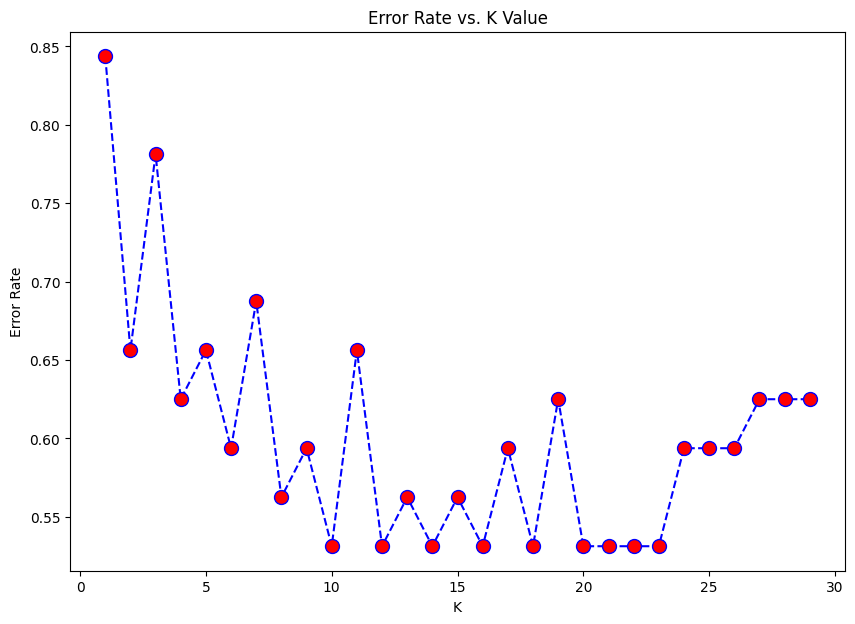

In [77]:
#Find the optimal number of neighbors
# Initialize an array that stores the error rates.
error_rates = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### Optimal K = 10

In [90]:
#Train classifier on the optimal k that we chose from the plot
k = 4 #Even though elbow plot shows 10, 4 seems to give more intuitive results
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

#Confusion matrix
cf_matrix_knn=metrics.confusion_matrix(y_test, preds)

#Performance metrics
print(metrics.confusion_matrix(y_test, preds))
print(metrics.classification_report(y_test, preds))

cohen_knn = metrics.cohen_kappa_score(y_test, preds)
print('Cohen Kappa: %.3f' % cohen_knn)

auc_score_knn = metrics.roc_auc_score(y_test,preds)
print('AUC: %.3f' % auc_score_knn)

[[10  6]
 [14  2]]
              precision    recall  f1-score   support

           0       0.42      0.62      0.50        16
           1       0.25      0.12      0.17        16

    accuracy                           0.38        32
   macro avg       0.33      0.38      0.33        32
weighted avg       0.33      0.38      0.33        32

Cohen Kappa: -0.250
AUC: 0.375


In [91]:
print('Latitude Range = ',df['LATITUDE'].min(),' to ',df['LATITUDE'].max())
print('Longitude Range = ',df['LONGITUDE'].min(),' to ',df['LONGITUDE'].max())

Latitude Range =  37.68635693147051  to  37.764142
Longitude Range =  -97.3147997  to  -97.24159001363934


In [92]:
# Create grid of all possible combinations between lat range and long range
lat,long = np.mgrid[37.66:37.77:100j, -97.37:-97.24:100j] #Complex number at the end specifies number of data points

df_to_map=pd.DataFrame()

df_to_map['LATITUDE']=lat.flatten()
df_to_map['LONGITUDE']=long.flatten()

df_to_map['RESULT']=knn.predict(df_to_map[['LONGITUDE','LATITUDE']])
df_to_map

,LATITUDE,LONGITUDE,RESULT
0,37.66,-97.370000,1
1,37.66,-97.368687,1
2,37.66,-97.367374,1
3,37.66,-97.366061,1
4,37.66,-97.364747,1
...,...,...,...
9995,37.77,-97.245253,0
9996,37.77,-97.243939,0
9997,37.77,-97.242626,0
9998,37.77,-97.241313,0


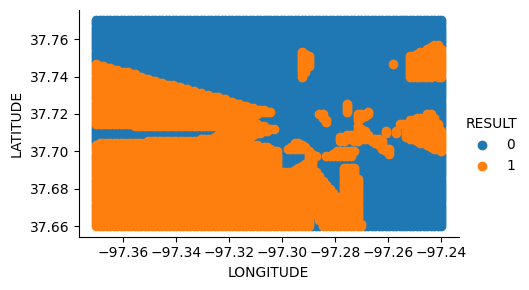

In [97]:
fg = sns.FacetGrid(data=df_to_map, hue='RESULT', aspect=1.60)
fg.map(plt.scatter, 'LONGITUDE', 'LATITUDE').add_legend()

<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

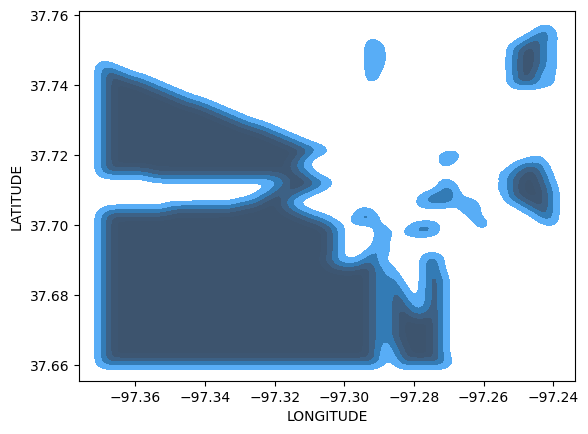

In [96]:
df_to_map_kde=df_to_map.loc[df_to_map['RESULT']==1]
sns.kdeplot(data=df_to_map_kde, x="LONGITUDE", y="LATITUDE", fill =True, levels=10, bw_adjust=0.25)

#### Tried logistic regression, naive bayes, and random forest. All had worse accuracy.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)
gs_rf = GridSearchCV(estimator=rf,
                     param_grid={'max_depth':np.arange(1,31)},
                     cv=5,
                     scoring='roc_auc')
#Train model
model_rf=gs_rf.fit(X_train,y_train)
#Make predictions
y_1 = gs_rf.predict(X_test)

diff=np.sum(y_test-y_1)
error1=diff/len(y_test)
error1

score = metrics.f1_score(y_test, y_1, pos_label=1)
print('F1 Score: %.3f' % score)

cf_matrix_rf=metrics.confusion_matrix(y_test, y_1)
print(cf_matrix_rf)
print(metrics.classification_report(y_test, y_1))

print("Accuracy:",metrics.accuracy_score(y_test, y_1))

cohen_rf=metrics.cohen_kappa_score(y_test, y_1)
print('Cohen Kappa: %.3f' % cohen_rf)

auc_score_rf = metrics.roc_auc_score(y_test, y_1)

print('AUC: %.3f' % auc_score_rf)

F1 Score: 0.353
[[ 4 12]
 [10  6]]
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        16
           1       0.33      0.38      0.35        16

    accuracy                           0.31        32
   macro avg       0.31      0.31      0.31        32
weighted avg       0.31      0.31      0.31        32

Accuracy: 0.3125
Cohen Kappa: -0.375
AUC: 0.312


## Data Visualization

In [18]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("dataset/dataset.csv")

df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Address", 
                        hover_data=["Address", "Listed"],
                        color="Listed",
                        color_continuous_scale=color_scale,
                        size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ModuleNotFoundError: No module named 'plotly'